In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("./creditcardcsvpresent.csv")
df.head()

,Merchant_id,Transaction date,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
0,3160040998,NaN,100.0,3000.0,N,5,Y,Y,0,0.0,0,Y
1,3160040998,NaN,100.0,4300.0,N,5,Y,Y,0,0.0,0,Y
2,3160041896,NaN,185.5,4823.0,Y,5,N,N,0,0.0,0,Y
3,3160141996,NaN,185.5,5008.5,Y,8,N,N,0,0.0,0,Y
4,3160241992,NaN,500.0,26000.0,N,0,Y,Y,800,677.2,6,Y


In [2]:
df.count()

Merchant_id                       3075
Transaction date                     0
Average Amount/transaction/day    3075
Transaction_amount                3075
Is declined                       3075
Total Number of declines/day      3075
isForeignTransaction              3075
isHighRiskCountry                 3075
Daily_chargeback_avg_amt          3075
6_month_avg_chbk_amt              3075
6-month_chbk_freq                 3075
isFradulent                       3075
dtype: int64

In [3]:
df.drop("Transaction date", axis =1, inplace = True)
df.shape

(3075, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3075 entries, 0 to 3074
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Merchant_id                     3075 non-null   int64  
 1   Average Amount/transaction/day  3075 non-null   float64
 2   Transaction_amount              3075 non-null   float64
 3   Is declined                     3075 non-null   object 
 4   Total Number of declines/day    3075 non-null   int64  
 5   isForeignTransaction            3075 non-null   object 
 6   isHighRiskCountry               3075 non-null   object 
 7   Daily_chargeback_avg_amt        3075 non-null   int64  
 8   6_month_avg_chbk_amt            3075 non-null   float64
 9   6-month_chbk_freq               3075 non-null   int64  
 10  isFradulent                     3075 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 264.4+ KB


In [5]:
print(df['Total Number of declines/day'].value_counts())
print(df['6-month_chbk_freq'].value_counts())
print(df['Merchant_id'].value_counts())

0     2384
1      134
6       96
2       92
5       87
3       82
4       69
9       46
8       45
7       37
20       3
Name: Total Number of declines/day, dtype: int64
0    2857
7      77
4      21
3      20
6      18
9      17
5      17
1      16
8      16
2      16
Name: 6-month_chbk_freq, dtype: int64
6661273532    13
6661273533    12
6661273531    12
6661273529     8
6661273530     7
              ..
3514946201     1
6239313639     1
6524453525     1
3479876243     1
4838852609     1
Name: Merchant_id, Length: 3015, dtype: int64


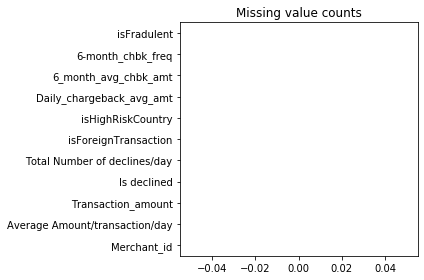

In [39]:
df.isnull().sum().plot(kind='barh', color='darkblue', figsize=(6,4))
plt.title("Missing value counts")
plt.tight_layout()

In [6]:
import seaborn as sns

In [7]:
from operator import eq

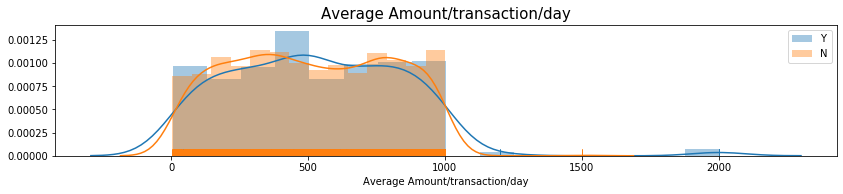

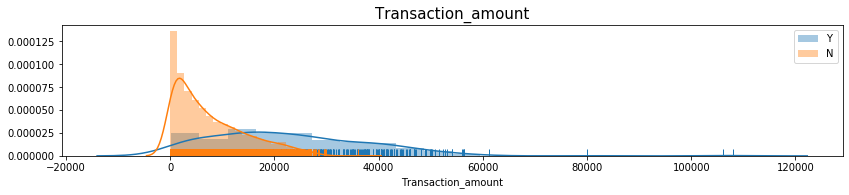

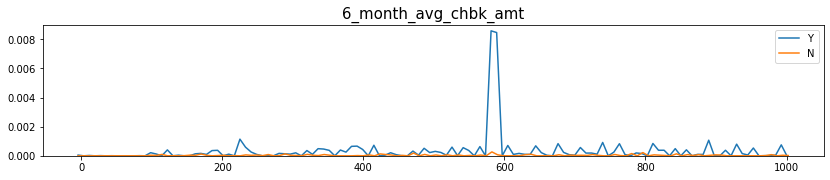

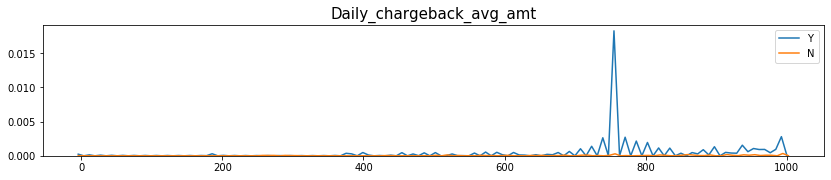

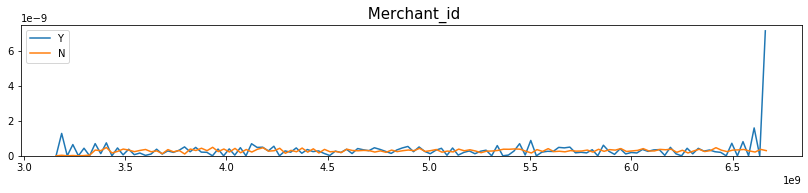

In [8]:
plt.figure(figsize=(14, 14))
plt.subplot(5, 1, 1)
plt.title('Average Amount/transaction/day', fontsize=15)
sns.distplot(df[eq(df['isFradulent'],str('Y'))]['Average Amount/transaction/day'], hist=True, rug=True, label="Y")
sns.distplot(df[eq(df['isFradulent'],str('N'))]['Average Amount/transaction/day'], hist=True, rug=True, label="N")
plt.legend()
plt.show()

# plt.rc('font', size=15)
plt.figure(figsize=(14, 14))
plt.subplot(5, 1, 2)
plt.title('Transaction_amount', fontsize=15)
sns.distplot(df[eq(df['isFradulent'],str('Y'))].Transaction_amount, hist=True, rug=True, label="Y")
sns.distplot(df[eq(df['isFradulent'],str('N'))].Transaction_amount, hist=True, rug=True, label="N")
plt.legend()

plt.figure(figsize=(14, 14))
plt.subplot(5, 1, 3)
plt.title('6_month_avg_chbk_amt', fontsize=15)
sns.kdeplot(df[df.isFradulent == 'Y']["6_month_avg_chbk_amt"],bw=1.5)
sns.kdeplot(df[df.isFradulent == 'N']["6_month_avg_chbk_amt"],bw=1.5)
plt.legend(['Y','N'])

plt.figure(figsize=(14, 14))
plt.subplot(5, 1, 4)
plt.title('Daily_chargeback_avg_amt', fontsize=15)
sns.kdeplot(df[df.isFradulent == 'Y']["Daily_chargeback_avg_amt"],bw=1.5)
sns.kdeplot(df[df.isFradulent == 'N']["Daily_chargeback_avg_amt"],bw=1.5)
plt.legend(['Y','N'])


plt.figure(figsize=(14, 14))
plt.subplot(5, 1, 5)
plt.title(' Merchant_id', fontsize=15)
sns.kdeplot(df[df.isFradulent == 'Y']["Merchant_id"],bw=1.5)
sns.kdeplot(df[df.isFradulent == 'N']["Merchant_id"],bw=1.5)
plt.legend(['Y','N'])
plt.show()


<Figure size 1008x1008 with 0 Axes>

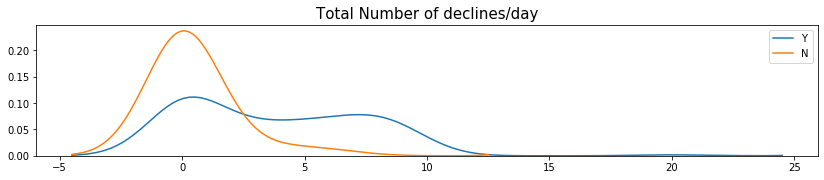

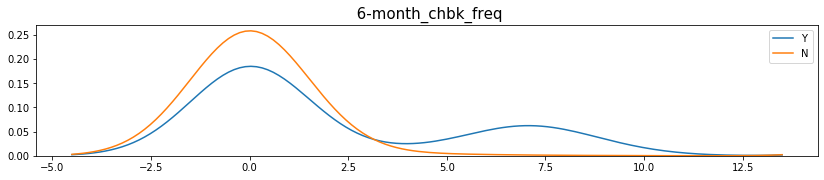

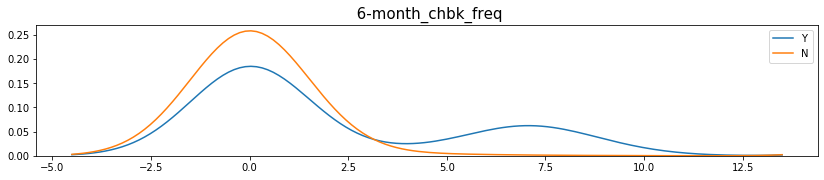

In [9]:
plt.figure(figsize=(14, 14))

plt.figure(figsize=(14, 14))
plt.subplot(5, 1, 3)
plt.title('Total Number of declines/day', fontsize=15)
sns.kdeplot(df[df.isFradulent == 'Y']["Total Number of declines/day"],bw=1.5)
sns.kdeplot(df[df.isFradulent == 'N']["Total Number of declines/day"],bw=1.5)
plt.legend(['Y','N'])

plt.figure(figsize=(14, 14))
plt.subplot(5, 1, 4)
plt.title(' 6-month_chbk_freq', fontsize=15)
sns.kdeplot(df[df.isFradulent == 'Y']["6-month_chbk_freq"],bw=1.5)
sns.kdeplot(df[df.isFradulent == 'N']["6-month_chbk_freq"],bw=1.5)
plt.legend(['Y','N'])


plt.figure(figsize=(14, 14))
plt.subplot(5, 1, 5)
plt.title(' 6-month_chbk_freq', fontsize=15)
sns.kdeplot(df[df.isFradulent == 'Y']["6-month_chbk_freq"],bw=1.5)
sns.kdeplot(df[df.isFradulent == 'N']["6-month_chbk_freq"],bw=1.5)
plt.legend(['Y','N'])
plt.show()

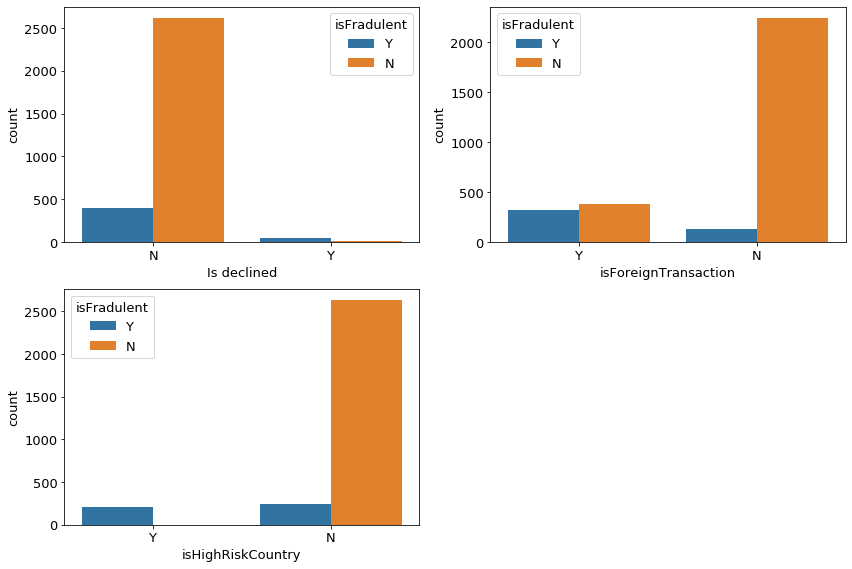

In [10]:
plt.rc('font', size=13)
plt.figure(figsize=(14, 14))

plt.rc('font', size=13)
plt.subplot(4, 2, 1);
sns.countplot('Is declined', hue='isFradulent', data=df)
plt.subplots_adjust(top = 1.2)

plt.subplot(4, 2, 2);
sns.countplot('isForeignTransaction', hue='isFradulent', data=df)

plt.subplot(4, 2, 3);
sns.countplot('isHighRiskCountry', hue='isFradulent', data=df)


In [11]:
X = df.drop("isFradulent", axis =1, inplace = False)
y = df["isFradulent"]

print(X.shape, y.shape)

(3075, 10) (3075,)


In [12]:
X['Is declined'].replace('Y',1,inplace=True)
X['Is declined'].replace('N',0,inplace=True)
                         
X['isForeignTransaction'].replace('Y',1,inplace=True)
X['isForeignTransaction'].replace('N',0,inplace=True)

X['isHighRiskCountry'].replace('Y',1,inplace=True)
X['isHighRiskCountry'].replace('N',0,inplace=True)

y.replace('Y',1, inplace=True)
y.replace('N',0, inplace=True)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [14]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=42, max_depth=1,learning_rate = 0.1)
gbrt.fit(X_train, y_train)


print('Gradient Boosting Classifier')
print("Accuracy of Training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy of Test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Gradient Boosting Classifier
Accuracy of Training set: 0.979
Accuracy of Test set: 0.977


In [15]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

print('Decision Tree Classifier')
print('Accuracy of Training set: {:.3f}'.format(classifier.score(X_train,y_train)))
print('Accuaracy of Test set: {:.3f}'.format(classifier.score(X_test, y_test)))

Decision Tree Classifier
Accuracy of Training set: 1.000
Accuaracy of Test set: 0.975


In [16]:
from sklearn.naive_bayes import GaussianNB
NBC = GaussianNB()
NBC.fit(X_train, y_train)

print('Naive Bayes Classifier')
print('Accuracy of Training set: {:.3f}'.format(NBC.score(X_train,y_train)))
print('Accuaracy of Test set: {:.3f}'.format(NBC.score(X_test, y_test)))

Naive Bayes Classifier
Accuracy of Training set: 0.852
Accuaracy of Test set: 0.865


In [17]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=1000, random_state=0)
forest.fit(X_train, y_train)
print('RandomForest Classifier')
print("Accuracy of Training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy of Test set: {:.3f}".format(forest.score(X_test, y_test)))

RandomForest Classifier
Accuracy of Training set: 1.000
Accuracy of Test set: 0.984


In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

scores = cross_val_score(forest, X, y, cv=15)
print('RandomForest Classifier Cross Validation')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


RandomForest Classifier Cross Validation
Accuracy: 0.98 (+/- 0.03)


In [19]:
from sklearn.metrics import accuracy_score

y_train_hat = forest.predict(X_train)
print('train accuracy : ',accuracy_score(y_train, y_train_hat))
y_test_hat = forest.predict(X_test)
print('test accuracy : ',accuracy_score(y_test, y_test_hat))

from sklearn.metrics import classification_report
print('\n')
class_names = ['N','Y']
print(classification_report(y_test, y_test_hat, target_names=class_names))

train accuracy :  1.0
test accuracy :  0.9843953185955787


              precision    recall  f1-score   support

           N       0.99      0.99      0.99       664
           Y       0.96      0.92      0.94       105

    accuracy                           0.98       769
   macro avg       0.97      0.96      0.97       769
weighted avg       0.98      0.98      0.98       769



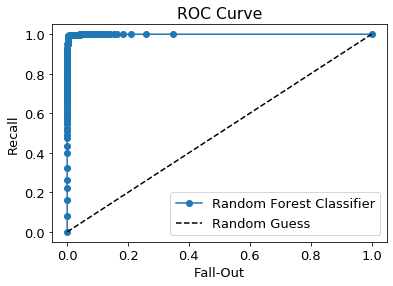

In [33]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y, forest.predict_proba(X)[:,1])

plt.plot(fpr, tpr, 'o-', label="Random Forest Classifier")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.legend()
plt.xlabel('Fall-Out')
plt.ylabel('Recall')
plt.title('ROC Curve')
plt.show()